In [1]:
import torch 
from torch import nn

In [8]:
from d2l_common import Classifier


class LeNet(Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.lr = lr
        self.num_classes = num_classes
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes), nn.Softmax()
        )

    def init_cnn(module):
        if type(module) == nn.Linear or type(module) == nn.Conv2d:
            nn.init.xavier_uniform_(module.weight)

    def layer_summary(self, x_shape):
        x = torch.randn(*x_shape)
        for layer in self.net:
            x = layer(x)
            print(layer.__class__.__name__, 'output shape:\t', x.shape)

In [9]:
model = LeNet()
model.layer_summary((1,1,28,28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
ReLU output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
ReLU output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
ReLU output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])
Softmax output shape:	 torch.Size([1, 10])


/Users/tangyun/opt/miniconda3/envs/rl/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/var/folders/xk/n87yv7vd6qj6v2nsxdv9q8d80000gn/T/ipykernel_53844/1676847634.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = layer(x)


In [4]:
from d2l_common import Trainer, FasionMNIST
trainer = Trainer(max_epochs=10)
data = FasionMNIST(batch_size=128)
model = LeNet(lr=0.1)
# model.apply_init()
trainer.fit(model, data)

/Users/tangyun/opt/miniconda3/envs/rl/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


complete 0 epoch train_loss=2.3190128803253174 validate_loss=2.3232576847076416
complete 1 epoch train_loss=2.2960140705108643 validate_loss=2.298691511154175
complete 2 epoch train_loss=2.3193299770355225 validate_loss=2.322237491607666
complete 3 epoch train_loss=2.313966751098633 validate_loss=2.3086085319519043
complete 4 epoch train_loss=2.303719997406006 validate_loss=2.314487934112549
complete 5 epoch train_loss=2.3181726932525635 validate_loss=2.321054220199585
complete 6 epoch train_loss=2.3114640712738037 validate_loss=2.329364538192749
complete 7 epoch train_loss=2.299173593521118 validate_loss=2.314605712890625
complete 8 epoch train_loss=2.2979769706726074 validate_loss=2.2961554527282715
complete 9 epoch train_loss=2.2928287982940674 validate_loss=2.298607349395752


In [10]:
from d2l_common import Trainer, FasionMNIST

def init_cnn(module):
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)


trainer = Trainer(max_epochs=10)
data = FasionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply(init_cnn)
trainer.fit(model, data)

/Users/tangyun/opt/miniconda3/envs/rl/lib/python3.10/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


complete 0 epoch train_loss=2.2976484298706055 validate_loss=2.3010783195495605
complete 1 epoch train_loss=1.9083080291748047 validate_loss=1.6831388473510742
complete 2 epoch train_loss=1.9277167320251465 validate_loss=1.6949039697647095
complete 3 epoch train_loss=1.7562575340270996 validate_loss=1.647192358970642
complete 4 epoch train_loss=1.8074489831924438 validate_loss=1.6643879413604736
complete 5 epoch train_loss=1.7284393310546875 validate_loss=1.5421983003616333
complete 6 epoch train_loss=1.7606139183044434 validate_loss=1.59458589553833
complete 7 epoch train_loss=1.7134822607040405 validate_loss=1.5898500680923462
complete 8 epoch train_loss=1.6349326372146606 validate_loss=1.595468282699585
complete 9 epoch train_loss=1.6473394632339478 validate_loss=1.581555724143982


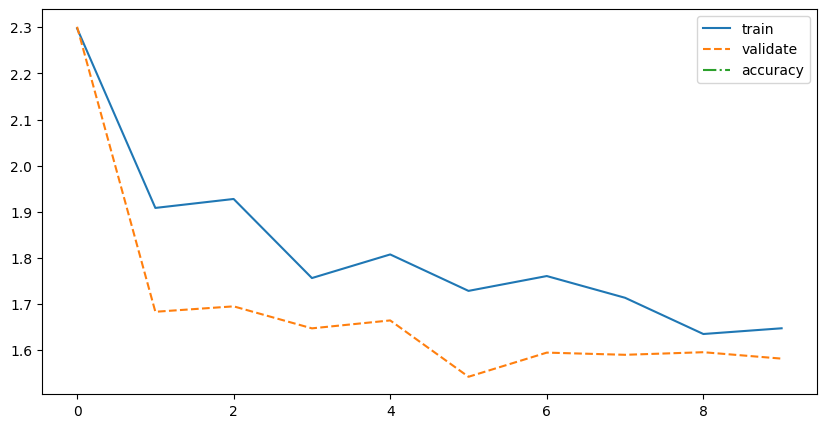

In [11]:
trainer.plot()